# mnist

## FedAvg, FedSGD, FedEla, FedProx, FedScaffold

Run following commands in the root path of `benchmark-lightly`.

```bash
function cmd(){
    fed_optim=$1

    task_name="mnist"
    partition="dirichlet"
    partition_args="alpha:100.0"
    exp_name=${fed_optim}_${partition}_${task_name}

    # Delete cache file
    rm -rf /tmp/${exp_name}.share
    rm -rf /tmp/${exp_name}
    rm -rf ./logs/${task_name}_${partition}/${fed_optim}

    # Run
    python -m openfed.tools.launch --nproc_per_node 6  --logdir /tmp benchmark/run.py\
        --fed_init_method file:///tmp/${exp_name}.share\
        --task ${task_name}\
        --data_root benchmark/datasets/${task_name}/data\
        --partition ${partition}\
        --partition_args ${partition_args}\
        --num_parts 1000\
        --epochs 1\
        --rounds 20\
        --act_clts 100\
        --tst_act_clts -1\
        --max_acg_step -1\
        --optim ${fed_optim}\
        --optim_args momentum:0.9 weight_decay:1e-4\
        --follower_lr 1e-1\
        --leader_lr 1.0\
        --bz 100\
        --gpu\
        --log_level SUCCESS\
        --log_dir logs\
        --exp_name ${exp_name}\
        --seed 0
}
```

### FedAvg

```bash
cmd 'fedavg'
```

### FedSGD

```bash
cmd 'fedsgd'
```

### FedEla

```bash
cmd 'fedela'
```

### FedProx

```bash
cmd 'fedprox'
```

### FedScaffold

```bash
cmd 'fedscaffold'
```

## Plot Curves

In [1]:
%matplotlib inline

from benchmark.utils.plot import plot

partition = "dirichlet"
task_name = "mnist"

items = dict(
    FedAvg=f'../logs/{task_name}/fedavg_{partition}_{task_name}/{task_name}.json',
    FedSgd=f'../logs/{task_name}/fedsgd_{partition}_{task_name}/{task_name}.json',
    FedEla=f'../logs/{task_name}/fedela_{partition}_{task_name}/{task_name}.json',
    FedProx=f'../logs/{task_name}/fedprox_{partition}_{task_name}/{task_name}.json',
    FedScaffold=f'../logs/{task_name}/fedscaffold_{partition}_{task_name}/{task_name}.json',
)

files = items.values()
labels = items.keys()

### Train Accuracy

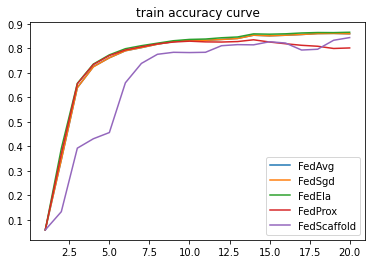

In [2]:
plot(
    files=files,
    labels=labels,
    attributes="accuracy",
    mode='train'
)

### Train Loss

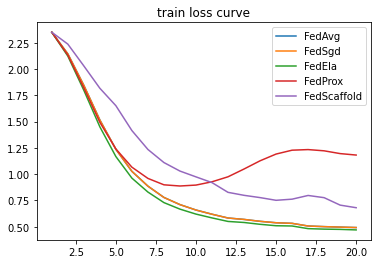

In [3]:
plot(
    files=files,
    labels=labels,
    attributes="loss",
    mode="train"
)

### Test Accuracy

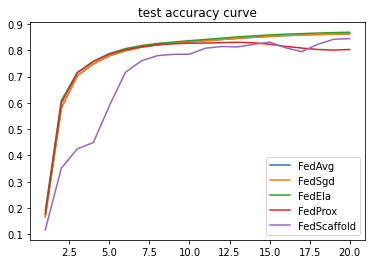

In [4]:
plot(
    files=files,
    labels=labels,
    attributes="accuracy",
    mode="test"
)

### Test Loss

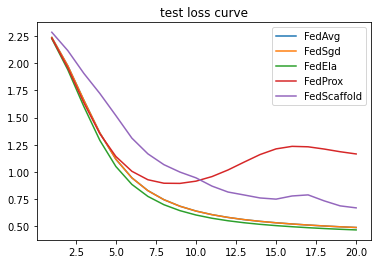

In [5]:
plot(
    files=files,
    labels=labels,
    attributes="loss",
    mode='test'
)